# Datasets & DataLoaders

We ideally want our dataset code to be decoupled from our model training code for better readability and modularity. PyTorch provides two data primitives:

- torch.utils.data.DataLoader

- torch.utils.data.Dataset

These allow us to use pre-loaded datasets as well as our own data.

**Dataset** stores the samples and their corresponding labels.

**DataLoader** wraps an iterable around the **Dataset** to enable easy access to the samples.

## Loading a Dataset
We are learning to load the Fashion-MNIST dataset from TorchVision. Fashion-MNIST is a dataset consisting 60,000 training examples and 10,000 test examples. Each example comprises a 28x28 grayscale image and an associated label from 0 to 10 classes.

We load the **FashionMINST** dataset with the following parameters:
- **root** is the path where the train/test data is stored.
- **train** specifies training or test dataset.
- **download=True** downloads the data from the internet if it's not available at **root**.
- **transform** and **target_transform** specify the feature and label transformations.

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [2]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

## Iterating and Visualizing the Dataset

We can index **Datasets** manually like a list: training_data[index]. We use **matplotlib** to visualize some samples in our training data.

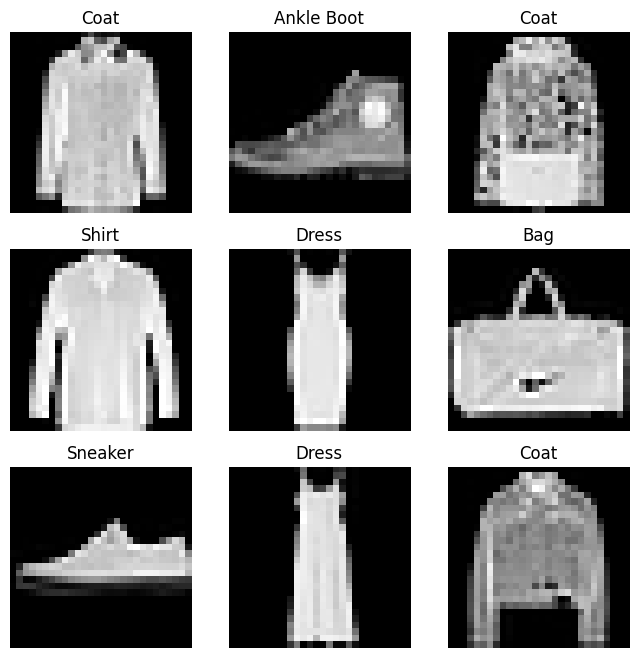

In [4]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")

plt.show()

## Creating a Custom Dataset for your files

A custom Dataset class must implement three functions: `__init__`, `__len__`, and `__getitem__`. The FashionMNIST images are stored in a directory *img_dir*, and their labels are stored separately in a CSV file *annotations_file*.

In [8]:
import os
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import DataLoader

In [7]:
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, index):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[index, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[index, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label


`__init__` : this function is run once when instantiating the Dataset object. We initialize the directory containing the images, the annotations file, and both transforms.

`__len__`: returns the number of samples in our dataset

`__getitem__`: it loads and returns a sample from the dataset at the given index *idx*. Based on the index, it identifies the image's location on disk, converts that to a tensor using *read_image*, retrieves the corresponding label from the csv data in *self.img_labels*, calls the transform functions on them(if applicable), and returns the tensor image and corresponding label in a tuple.

## Preparing your data from training with DataLoaders

The **Dataset** retrieves our dataset's features and labels one sample at a time. While training a model, we typically want to pass samples in "minibatches", reshuffle the data at every epoch to reduce model overfitting, and use Python's **multiprocessing** to speed up data retrieval.

**DataLoader** is an iterable that abstracts this complexity for us in an easy API.

In [9]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

## Iterate through the DataLoader

We have loaded the dataset into the **DataLoader** and can iterate through the dataset as needed. Each iteration below returns a batch of *train_features* and *train_labels* (containing *batch_size=64* features and labels respectively). Because we specified *shuffle=True*, after we iterate over all batches the data is shuffled.

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


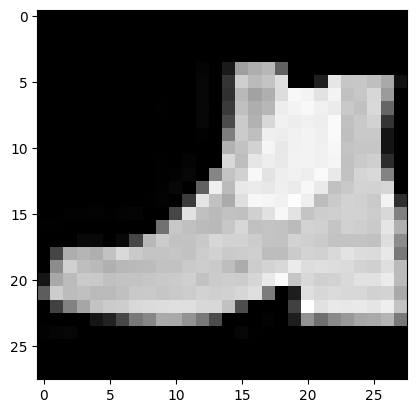

label: 9


In [11]:
# Display image and label
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap='gray')
plt.show()
print(f"label: {label}")